##  Train CNN for MNIST dataset.

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


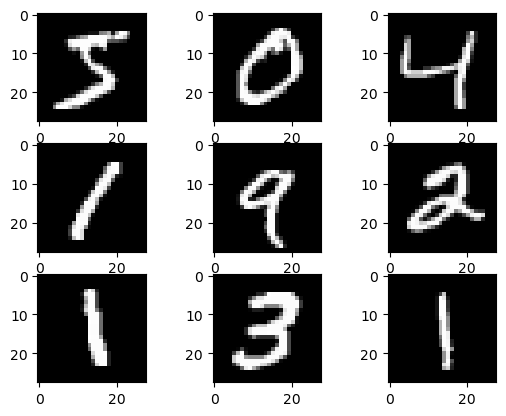

In [1]:
# Example of loading the mnist dataset
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()


# Preprocessing the data

# Reshape dataset to have single channel
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

# Convert from integers to floats
train_X = train_X.astype('float32') 
test_X = test_X.astype('float32')

# Normalize the pixel values in the range [0,1]
train_X = train_X/255.0
test_X = test_X/255.0

# One hot encode target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Define the model 
model = Sequential()
# First convolutional layer with 32 filters of size 3x3 and RELU activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 2D Max pooling layer with a pool size of 2x2
model.add(MaxPooling2D((2, 2)))
# Second convolutional layer with 64 filters of size 3x3 and RELU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))
# Antoher 2D Max pooling layer with a pool size of 2x2
model.add(MaxPooling2D((2, 2)))
# Third convolutional layer with 64 filters of size 3x3 and ReLU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))
# Flattening the output of previous layer into a 1D vector
model.add(Flatten())
# Adding a hidden neural network layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))
# Adding the final fully connected neural network layer with 10 neurons (one for each digit class in the MNIST dataset)
# and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_y, epochs=10, batch_size=64, validation_data=(test_X, test_y))

# model.save('mnist_model.h5')

Epoch 1/10
938/938 [==============================] - 45s 44ms/step - loss: 0.1861 - accuracy: 0.9430 - val_loss: 0.0792 - val_accuracy: 0.9763
Epoch 2/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0523 - accuracy: 0.9834 - val_loss: 0.0438 - val_accuracy: 0.9857
Epoch 3/10
938/938 [==============================] - 50s 53ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0325 - val_accuracy: 0.9902
Epoch 4/10
938/938 [==============================] - 51s 54ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0299 - val_accuracy: 0.9899
Epoch 5/10
938/938 [==============================] - 42s 45ms/step - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.0331 - val_accuracy: 0.9904
Epoch 6/10
938/938 [==============================] - 41s 44ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0339 - val_accuracy: 0.9892
Epoch 7/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0408 - val_accuracy:

In [3]:
# Evaluating the model on the test set 
score = model.evaluate(test_X, test_y, verbose = 0)
print('loss = ', score[0])
print('accuracy = ', score[1])

loss =  0.03433018922805786
accuracy =  0.9911999702453613


In [4]:
# Predictions on the test set

# Single value prediction in number
# Taking the 57th image from the test set and returns the index of the class with the highest probability
predictions = model.predict(test_X, verbose = 0)
print(np.argmax(np.round(predictions[5999])))

7


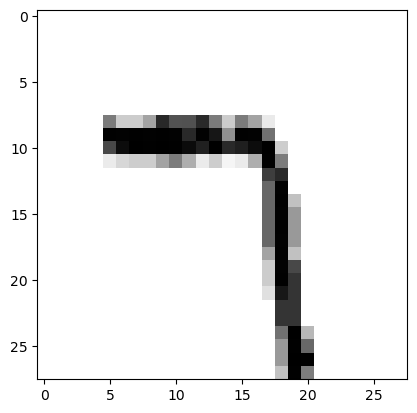

In [5]:
# Single value prediction in graph (plot)

# This will display the binary image corresponding to the 57th test sample from the MNIST dataset
plt.imshow(test_X[5999].reshape(28,28), cmap = plt.cm.binary)
plt.show()

## Visualize the filters and feature maps of the first convolutional layer

In [14]:
layer_name = 'conv2d'
layer = model.get_layer(layer_name)
filters = layer.get_weights()[0]
filters = np.squeeze(filters) # Remove any singleton dimensions

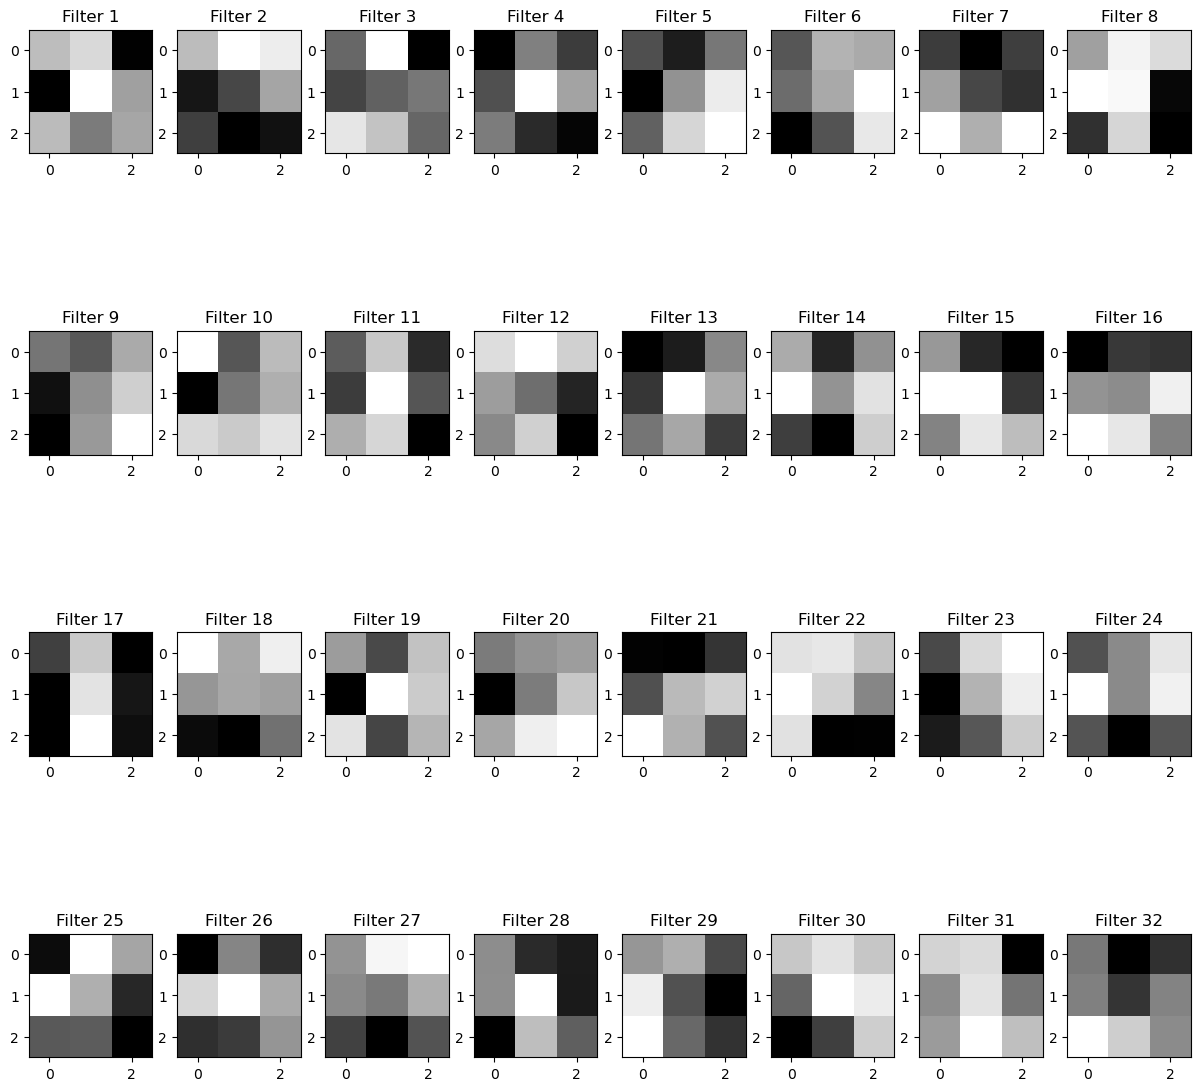

In [23]:
n_filters = filters.shape[-1] # Get the number of filters
n_cols = 8 # Set the number of columns for the subplot grid
n_rows = n_filters // n_cols  # Set the number of rows for the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,15)) # Create a figure and a grid of subplots
for i in range(n_filters):
    ax = axes.flat[i] # Get the subplot for the current filter
    ax.imshow(filters[:,:,i], cmap="gray") # Plot the filter as an image
    ax.set_title(f"Filter {i+1}") # Set the title for the subplot
plt.show() # Show the figure

In [19]:
import tensorflow as tf

1/1 [==============================] - 0s 143ms/step


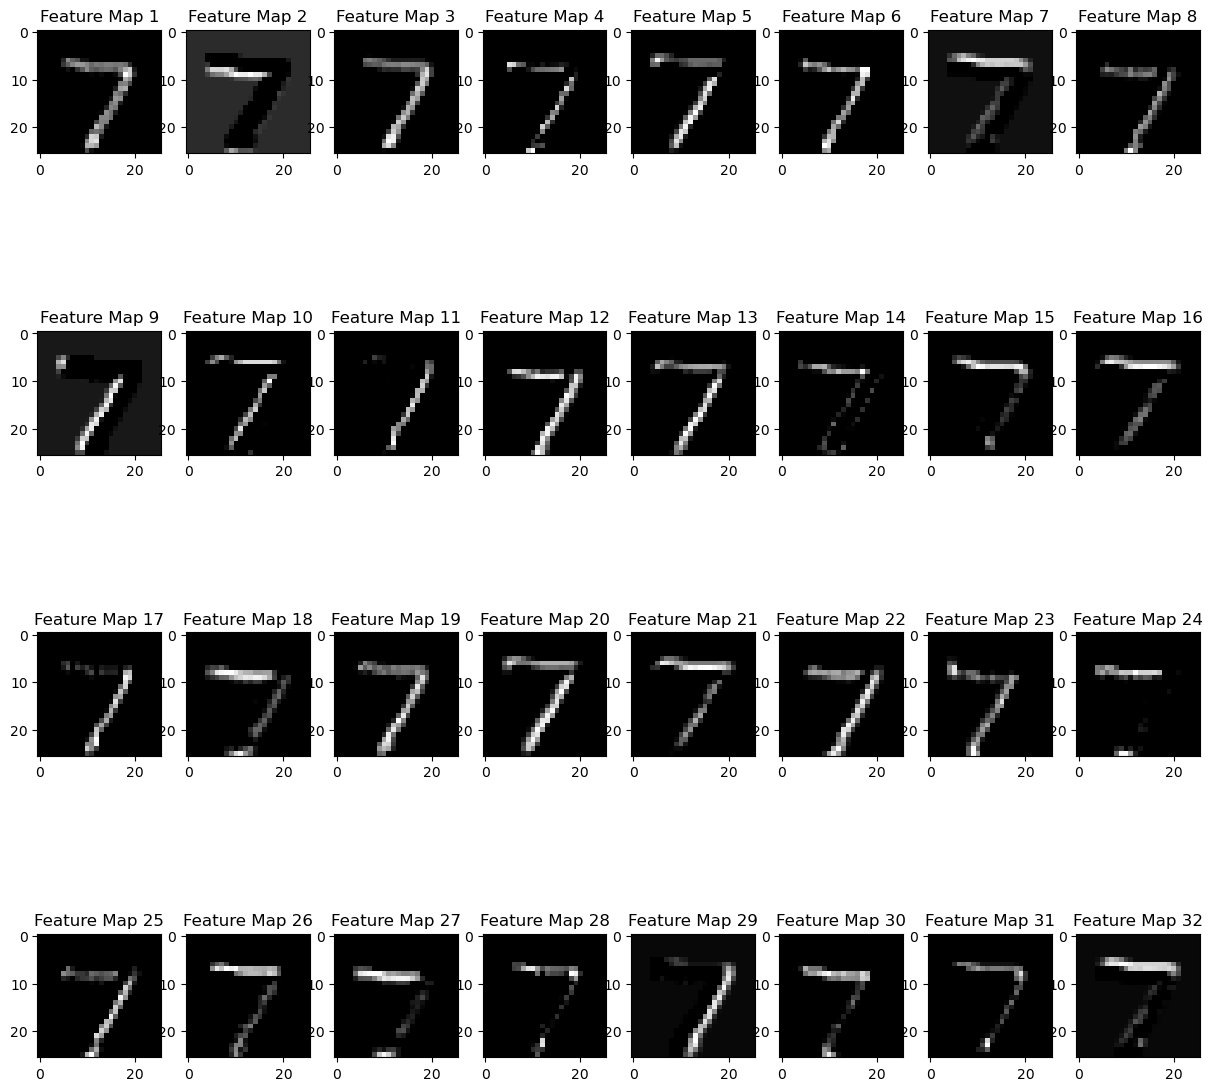

In [25]:
image_index = 0 # Change this to your image index
image = test_X[image_index] # Get an input image from the test set

sub_model = tf.keras.Model(inputs=model.inputs, outputs=layer.output) # Create a sub-model that outputs the feature maps of the layer

feature_maps = sub_model.predict(np.expand_dims(image, axis=0)) # Predict the feature maps for the input image
feature_maps = np.squeeze(feature_maps) # Remove any singleton dimensions

n_feature_maps = feature_maps.shape[-1] # Get the number of feature maps
n_cols = 8 # Set the number of columns for the subplot grid
n_rows = n_feature_maps // n_cols # Set the number of rows for the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,15)) # Create a figure and a grid of subplots
for i in range(n_feature_maps):
    ax = axes.flat[i] # Get the subplot for the current feature map
    ax.imshow(feature_maps[:,:,i], cmap="gray") # Plot the feature map as an image
    ax.set_title(f"Feature Map {i+1}") # Set the title for the subplot
plt.show() # Show the figure

# 

## Hyperparameters and Optimizers

##### Now I will change activation function, number of layers, batch size and epochs to check my model on different hyperparameters and optimizers

In [28]:
from keras.layers import Activation

opt_model = Sequential()
opt_model.add(Conv2D(64, (3,3), activation='tanh', input_shape=(28, 28, 1)))
opt_model.add(MaxPooling2D(pool_size=(2,2)))
opt_model.add(Conv2D(64, (3,3), activation='tanh'))
opt_model.add(MaxPooling2D((2, 2)))
opt_model.add(Flatten())
opt_model.add(Dense(64))
opt_model.add(Dense(10))
opt_model.add(Activation('sigmoid'))

opt_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
opt_model.fit(train_X, train_y, epochs=5, batch_size=64, validation_data=(test_X, test_y))

Epoch 1/5
938/938 [==============================] - 65s 69ms/step - loss: 0.1548 - accuracy: 0.9536 - val_loss: 0.0541 - val_accuracy: 0.9816
Epoch 2/5
938/938 [==============================] - 65s 70ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0464 - val_accuracy: 0.9864
Epoch 3/5
938/938 [==============================] - 67s 71ms/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0512 - val_accuracy: 0.9837
Epoch 4/5
938/938 [==============================] - 69s 73ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0550 - val_accuracy: 0.9838
Epoch 5/5
938/938 [==============================] - 71s 76ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0498 - val_accuracy: 0.9846


In [31]:
loss, accuracy = opt_model.evaluate(test_X, test_y, verbose = 0)
print('loss = ', loss)
print('accuracy = ', accuracy)

loss =  0.049817025661468506
accuracy =  0.9846000075340271


In [40]:
opt_predictions = opt_model.predict(test_X, verbose = 0)
print(np.argmax(np.round(opt_predictions[10])))

0


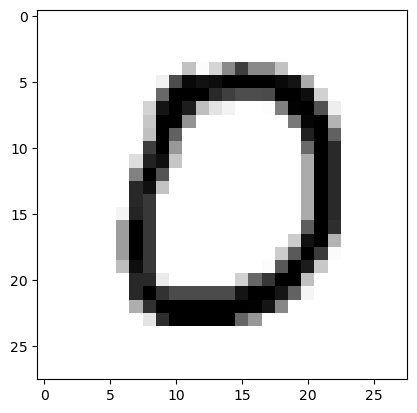

In [41]:
plt.imshow(test_X[10].reshape(28,28), cmap = plt.cm.binary)
plt.show()